In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
import pandas as pd
from os import listdir
from os.path import isfile, join
from os import path
import seaborn as sns

from scipy.signal import savgol_filter

In [24]:
font = matplotlib.font_manager.findSystemFonts(fontpaths="../Roboto", fontext='ttf')
plt.rcParams['font.family'] = 'Roboto-Regular'

In [34]:
def loadData(datapath, datatype, folder):
    if not path.exists(datapath):
        return []
    files = [f for f in listdir(datapath) if isfile(join(datapath, f)) and "Store" not in f]
    data = {}
    for f in files:
        data[f] = pd.read_csv(datapath+f)
    print(list(data.keys()))
    return data

In [35]:
def legendsName(fileName):
    if("PER_Dueling" in fileName):
        return "PER Dueling"
    elif("Dueling" in fileName):
        return "Dueling"
    elif("PER" in fileName):
        return "PER"
    elif("Baseline" in fileName):
        return "Baseline"

In [44]:
def smooth(x,y,name,color):
    #apply a Savitzky-Golay filter
    smooth = savgol_filter(y, window_length = 101, polyorder = 7)#, mode = 'nearest') 351
    plt.plot(x, smooth, label=legendsName(name), color=color, alpha=1)

In [164]:
def plot(folder, train, datatype):
    minx = 3000
    datapath = f"../data/report_results/{folder}/{train}/{datatype}/"
    data = loadData(datapath, train, folder)
    if len(data) == 0:
        return
    colors = ["maroon", "darkviolet", "navy", "seagreen"]
    i = 0
    plt.figure(figsize=(17,7))
    for d in sorted(data.keys()):
        name = d
        if("Mean" in name):
            graph = data[name]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            #plt.plot(x,y, color=colors[i], alpha=1, linewidth=0.7)
            smooth(x,y, name, colors[i])
        elif("Std" in name):
            graph = data[name]
            xfit = graph[data[name].keys().values[1]]
            yfit = graph[data[name].keys().values[2]]
            plt.fill_between(xfit, y - yfit, y + yfit, color=colors[i], alpha=0.1)
            i+=1
        elif("Loss" in name):
            graph = data[name]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            plt.plot(x,y, color=colors[i], alpha=1, linewidth=0.7, label=legendsName(name))
            i+=1
        elif("Actions" in name):
            graph = data[name]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            plt.plot(x,y, color=colors[i], alpha=1, linewidth=0.7, label=legendsName(name))
            i+=1
        else:
            graph = data[name]#.loc[data[name][data[name].keys().values[1]] < 1500]
            x = graph[data[name].keys().values[1]]
            y = graph[data[name].keys().values[2]]
            plt.plot(x,y, color=colors[i], alpha=0.2, linewidth=0.7)
            smooth(x,y, name, colors[i])
            i+=1
         
        if max(x) < minx:
            minx=max(x)
            
    plt.grid(color="black")
    plt.title(f"{train} {folder} {datatype}", fontsize=40)
    plt.xlim(0, minx+50)
    plt.xlabel('Episode', fontsize=30)
    plt.ylabel('Reward', fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.legend(fontsize=20)
    plt.savefig(f"../plt/Reward_{folder}_{train}_{datatype}")#, transparent=True)
    plt.show()

In [165]:
datatypes = ["reward", "actions", "loss"]
train = ["training", "test"]
allfoldes = ["only3-deterministisk", "all4", "all4-new-params", "all4-test-new-params-memory-skip", "all4-test-noframeskip"]

['run-PER_Dueling_2019-12-19 13_52_21.723807-tag-Training_Reward.csv', 'run-Baseline_2019-12-19 13_52_02.077994-tag-Training_Reward.csv', 'run-PER_2019-12-19 13_52_15.207766-tag-Training_Reward.csv']


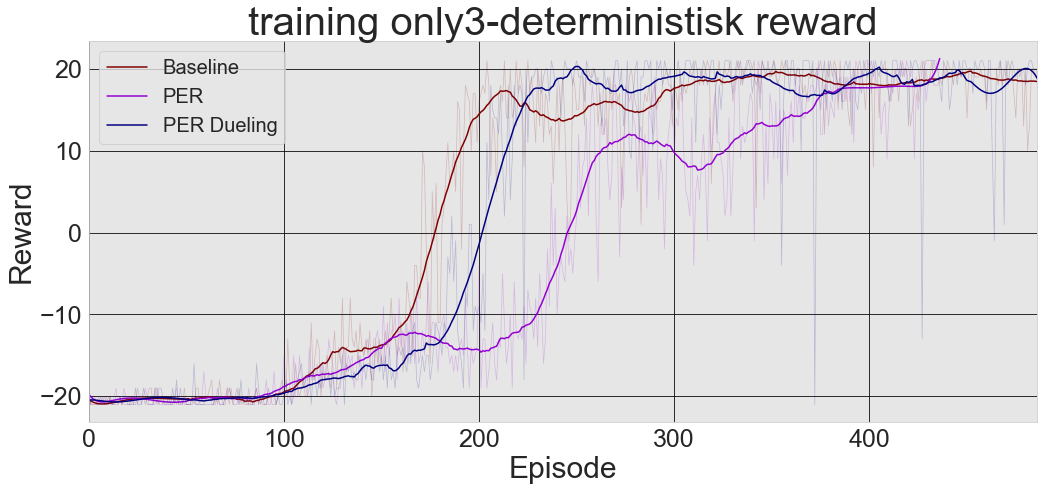

['run-Baseline_2019-12-19 13_52_02.077994-tag-Actions.csv', 'run-PER_Dueling_2019-12-19 13_52_21.723807-tag-Actions.csv', 'run-PER_2019-12-19 13_52_15.207766-tag-Actions.csv']


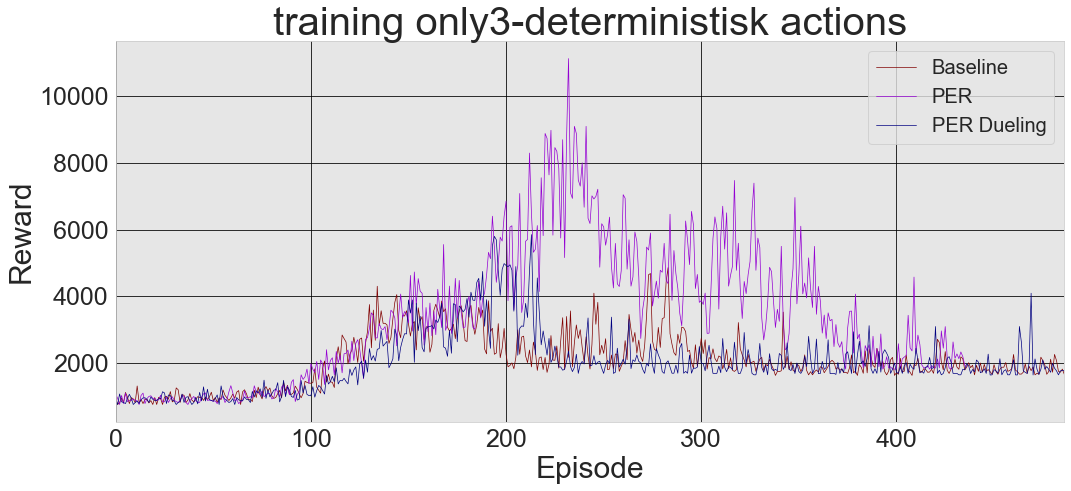

['run-PER_2019-12-19 13_52_15.207766-tag-Training_Loss.csv', 'run-Baseline_2019-12-19 13_52_02.077994-tag-Training_Loss.csv', 'run-PER_Dueling_2019-12-19 13_52_21.723807-tag-Training_Loss.csv']


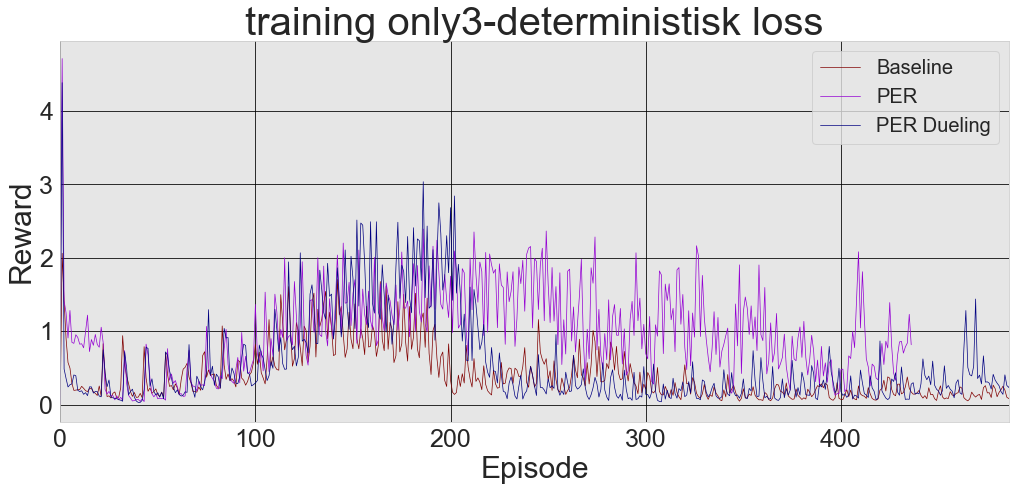

['run-PER_Dueling_2019-12-19 16_28_29.021757_Pong-v0-tag-Training_Reward.csv', 'run-PER_2019-12-19 16_28_22.987601_Pong-v0-tag-Training_Reward.csv', 'run-Baseline_2019-12-19 16_28_11.315370_Pong-v0-tag-Training_Reward.csv', 'run-Dueling_2019-12-19 16_28_18.958179_Pong-v0-tag-Training_Reward.csv']


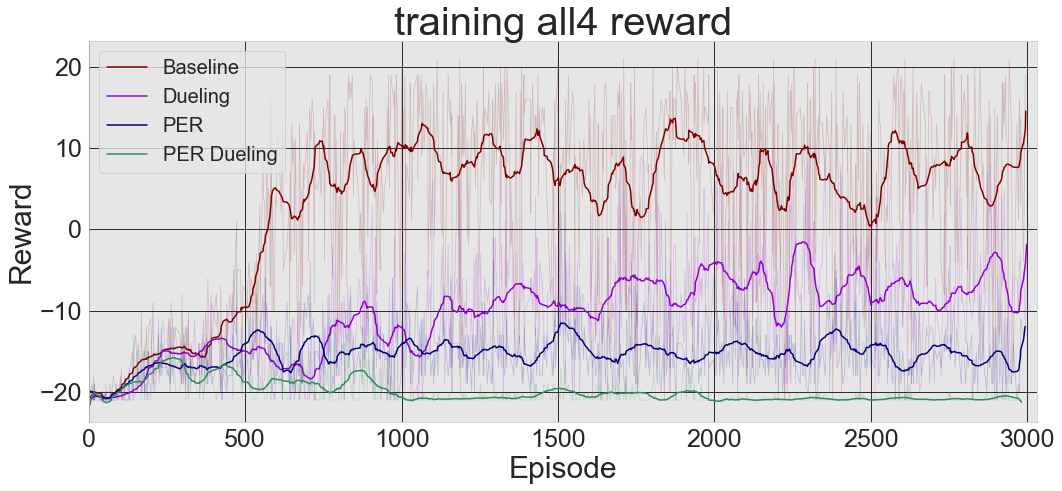

['run-PER_Dueling_2019-12-19 16_28_29.021757_Pong-v0-tag-Actions.csv', 'run-PER_2019-12-19 16_28_22.987601_Pong-v0-tag-Actions.csv', 'run-Baseline_2019-12-19 16_28_11.315370_Pong-v0-tag-Actions.csv', 'run-Dueling_2019-12-19 16_28_18.958179_Pong-v0-tag-Actions.csv']


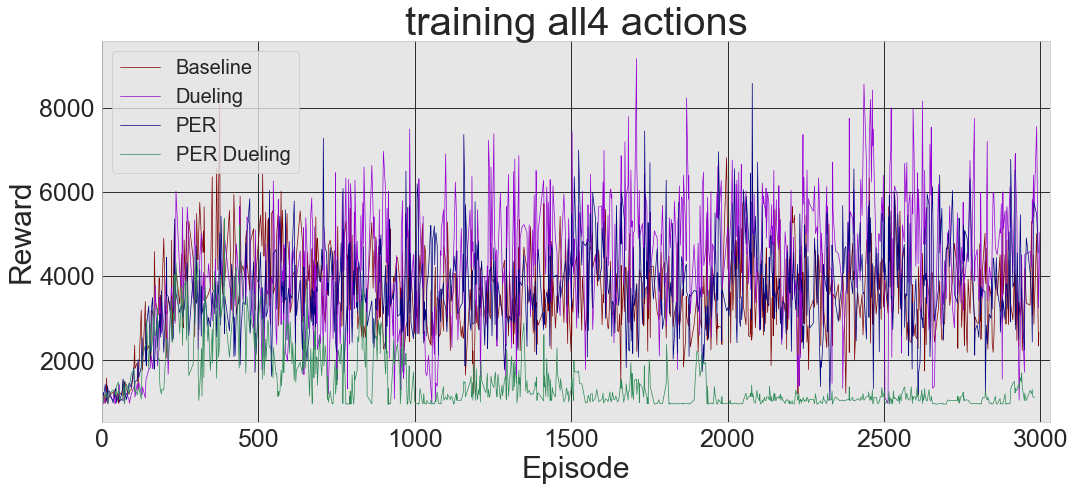

['run-PER_Dueling_2019-12-19 16_28_29.021757_Pong-v0-tag-Training_Loss.csv', 'run-Baseline_2019-12-19 16_28_11.315370_Pong-v0-tag-Training_Loss.csv', 'run-PER_2019-12-19 16_28_22.987601_Pong-v0-tag-Training_Loss.csv', 'run-Dueling_2019-12-19 16_28_18.958179_Pong-v0-tag-Training_Loss.csv']


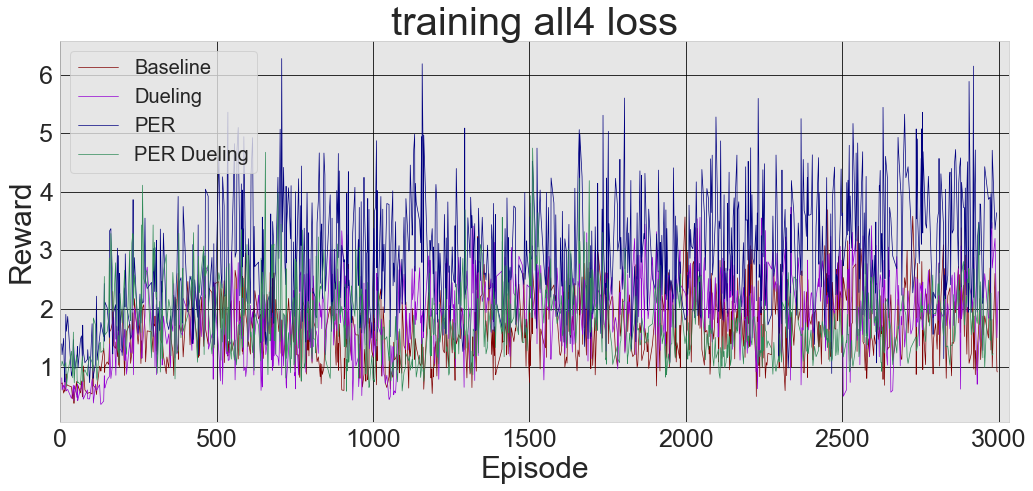

['run-PER_Dueling_2019-12-21 12_25_04.984279_Pong-v0-tag-Training_Reward.csv', 'run-Baseline_2019-12-21 12_13_28.721605_Pong-v0-tag-Training_Reward.csv', 'run-Dueling_2019-12-21 12_13_38.862551_Pong-v0-tag-Training_Reward.csv', 'run-PER_2019-12-21 12_25_02.940992_Pong-v0-tag-Training_Reward.csv']


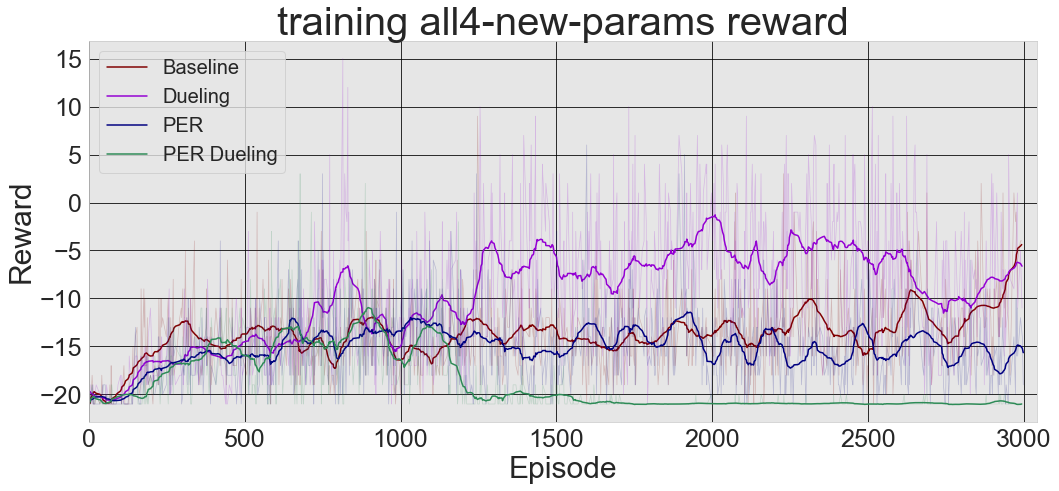

['run-PER_2019-12-21 12_25_02.940992_Pong-v0-tag-Actions.csv', 'run-PER_Dueling_2019-12-21 12_25_04.984279_Pong-v0-tag-Actions.csv', 'run-Baseline_2019-12-21 12_13_28.721605_Pong-v0-tag-Actions.csv', 'run-Dueling_2019-12-21 12_13_38.862551_Pong-v0-tag-Actions.csv']


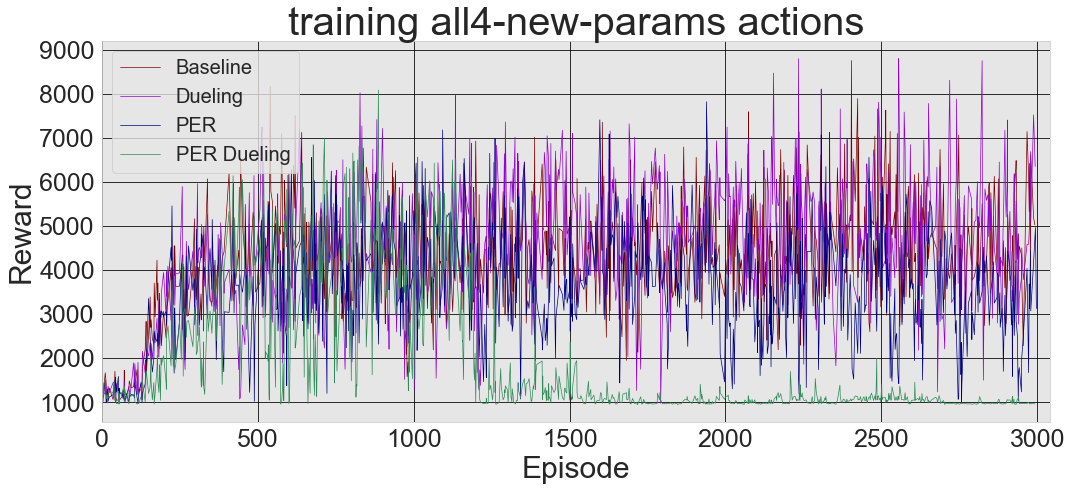

['run-Dueling_2019-12-21 12_13_38.862551_Pong-v0-tag-Training_Loss.csv', 'run-PER_Dueling_2019-12-21 12_25_04.984279_Pong-v0-tag-Training_Loss.csv', 'run-PER_2019-12-21 12_25_02.940992_Pong-v0-tag-Training_Loss.csv', 'run-Baseline_2019-12-21 12_13_28.721605_Pong-v0-tag-Training_Loss.csv']


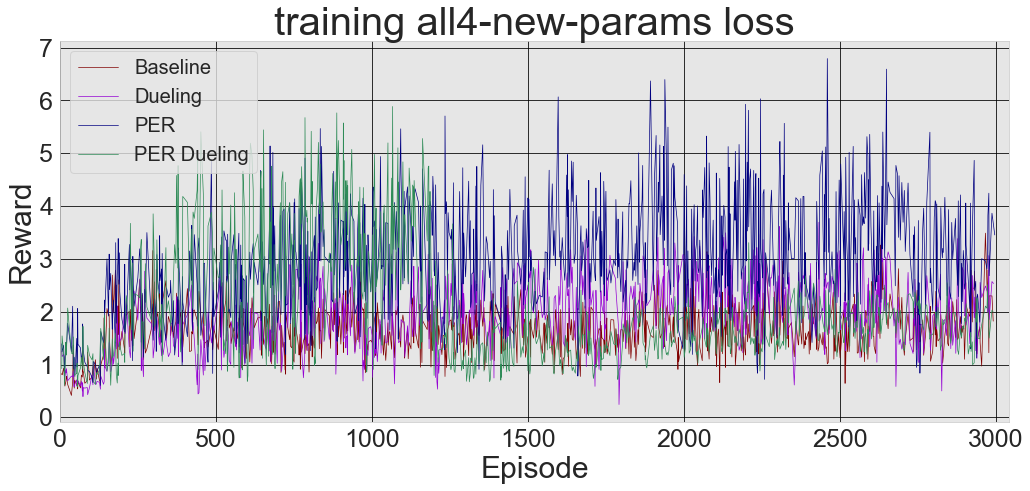

['run-Baseline_2019-12-22 08_40_50.277152_Pong-v0-tag-Training_Reward.csv', 'run-Dueling_2019-12-22 08_41_01.893834_Pong-v0-tag-Training_Reward.csv', 'run-PER_Dueling_2019-12-22 08_55_53.058717_Pong-v0-tag-Training_Reward.csv', 'run-PER_2019-12-22 08_41_12.321268_Pong-v0-tag-Training_Reward.csv']


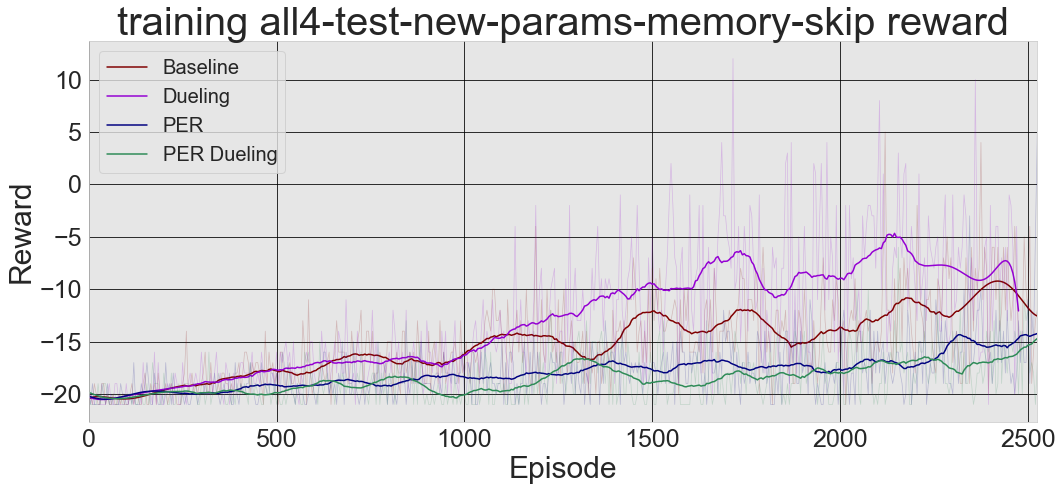

['run-PER_Dueling_2019-12-22 08_55_53.058717_Pong-v0-tag-Actions.csv', 'run-Dueling_2019-12-22 08_41_01.893834_Pong-v0-tag-Actions.csv', 'run-Baseline_2019-12-22 08_40_50.277152_Pong-v0-tag-Actions.csv', 'run-PER_2019-12-22 08_41_12.321268_Pong-v0-tag-Actions.csv']


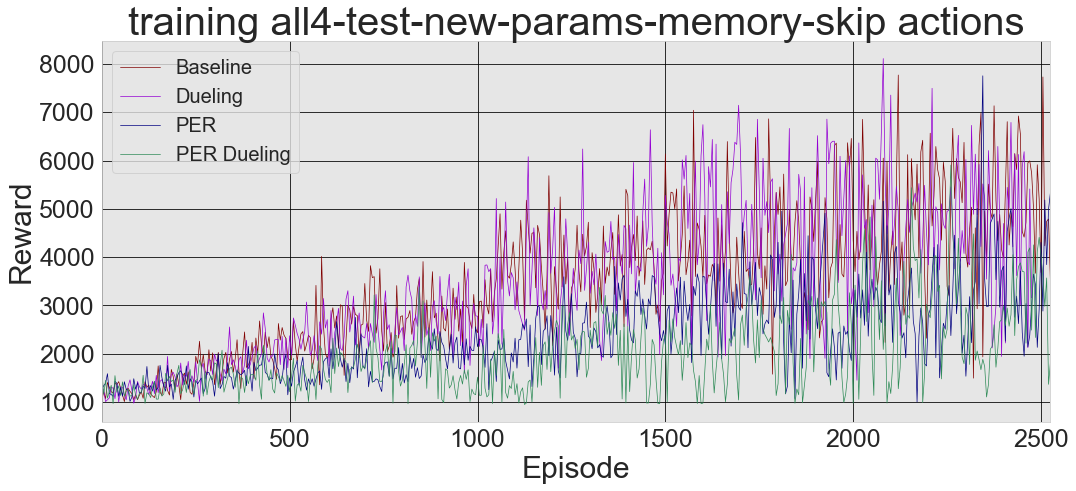

['run-Dueling_2019-12-22 08_41_01.893834_Pong-v0-tag-Training_Loss.csv', 'run-PER_2019-12-22 08_41_12.321268_Pong-v0-tag-Training_Loss.csv', 'run-Baseline_2019-12-22 08_40_50.277152_Pong-v0-tag-Training_Loss.csv', 'run-PER_Dueling_2019-12-22 08_55_53.058717_Pong-v0-tag-Training_Loss.csv']


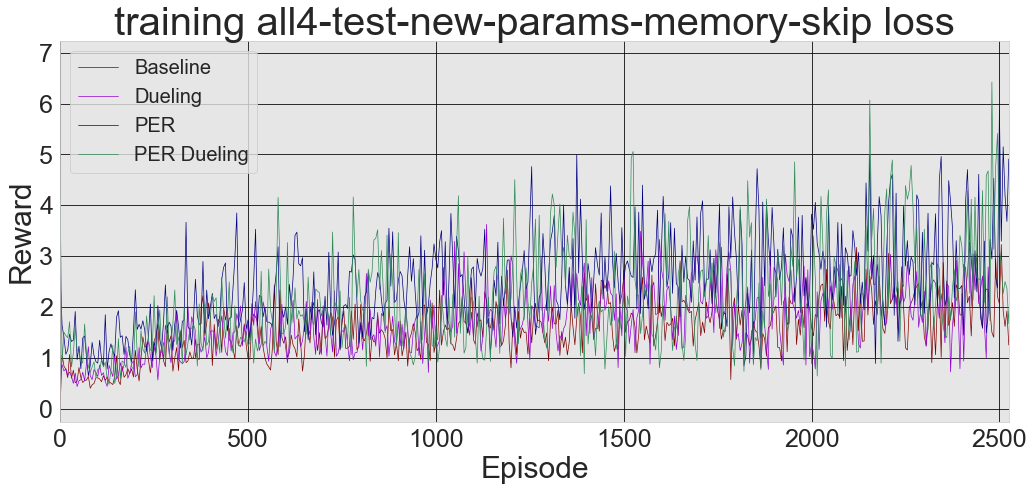

['run-Dueling_2019-12-22 08_41_01.893834_Pong-v0-tag-Test_Reward_Std.csv', 'run-PER_2019-12-22 08_41_12.321268_Pong-v0-tag-Test_Reward_Mean.csv', 'run-Baseline_2019-12-22 08_40_50.277152_Pong-v0-tag-Test_Reward_Std.csv', 'run-Dueling_2019-12-22 08_41_01.893834_Pong-v0-tag-Test_Reward_Mean.csv', 'run-PER_Dueling_2019-12-22 08_55_53.058717_Pong-v0-tag-Test_Reward_Std.csv', 'run-Baseline_2019-12-22 08_40_50.277152_Pong-v0-tag-Test_Reward_Mean.csv', 'run-PER_Dueling_2019-12-22 08_55_53.058717_Pong-v0-tag-Test_Reward_Mean.csv', 'run-PER_2019-12-22 08_41_12.321268_Pong-v0-tag-Test_Reward_Std.csv']


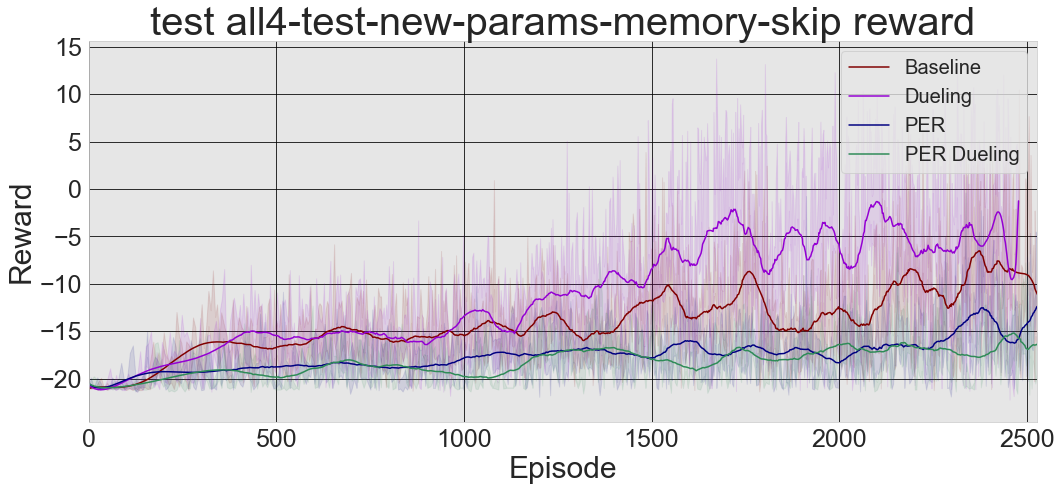

[]
[]
[]
[]
[]
[]


In [166]:
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
for f in allfoldes:
    for t in train:
        for d in datatypes:
            plot(f, t, d)